In [28]:
#https://facebook.github.io/prophet/docs/additional_topics.html#saving-models

In [29]:
# Python
import pandas as pd
from prophet import Prophet

In [30]:
# Python
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [31]:
# Python
m = Prophet()
m.fit(df)

12:20:15 - cmdstanpy - INFO - Chain [1] start processing
12:20:15 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [33]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.206964,7.523153,8.906743
3266,2017-01-16,8.531958,7.779057,9.259709
3267,2017-01-17,8.319376,7.621123,9.082872
3268,2017-01-18,8.151991,7.392250,8.832808
3269,2017-01-19,8.163908,7.432142,8.885317


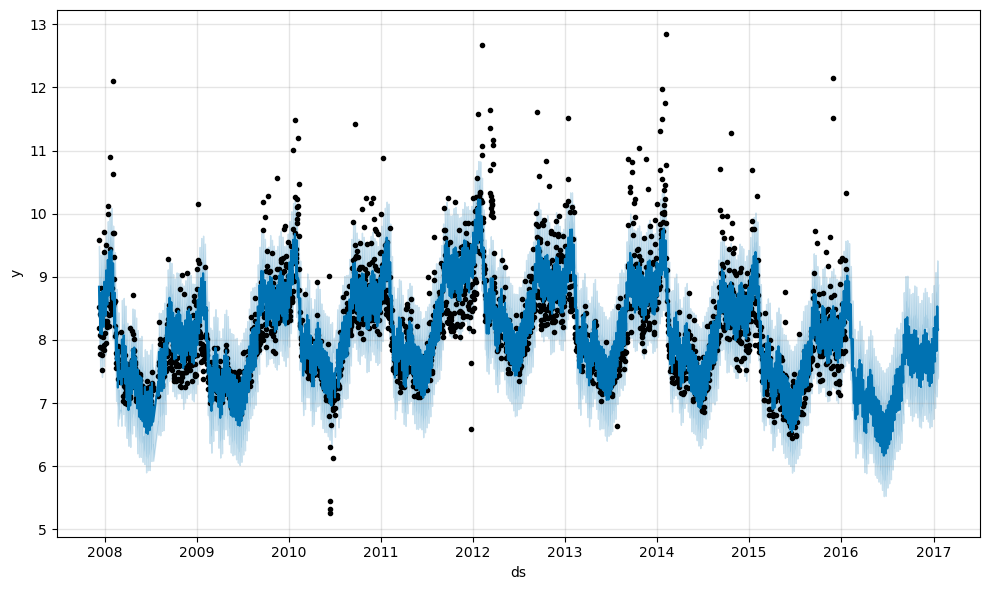

In [34]:
# Python
fig1 = m.plot(forecast)

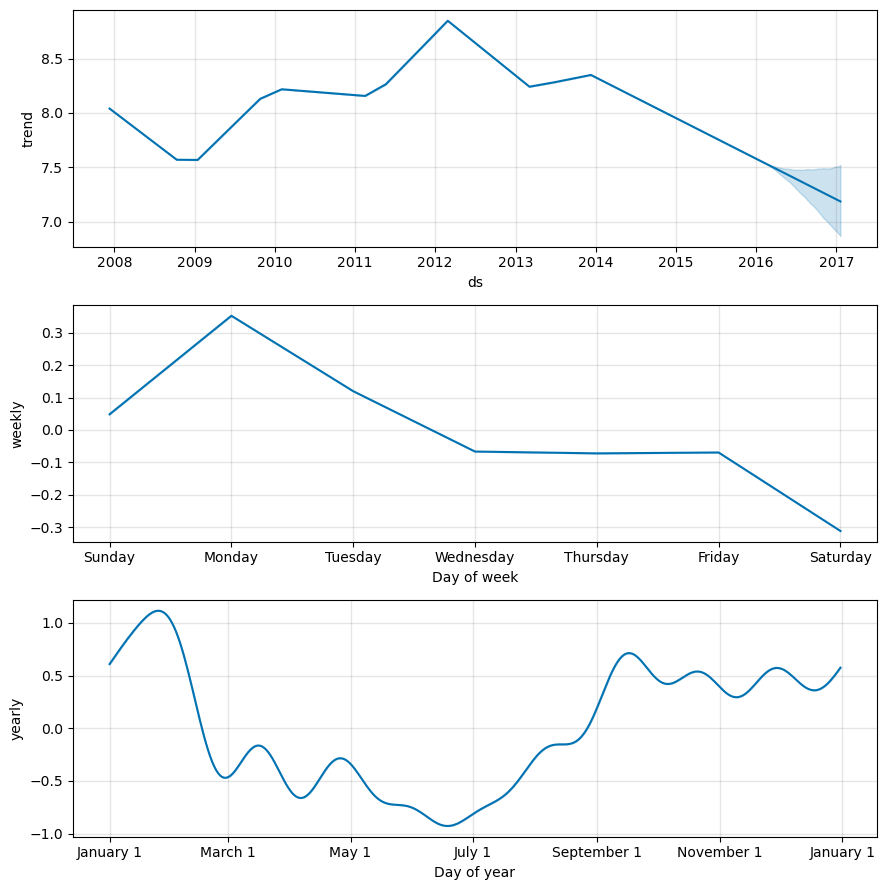

In [35]:
# Python
fig2 = m.plot_components(forecast)

In [36]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [37]:
# Python
plot_components_plotly(m, forecast)

In [38]:
# Python saving model
from prophet.serialize import model_to_json, model_from_json

with open('serialized_model.json', 'w') as fout:
    fout.write(model_to_json(m))  # Save model

with open('serialized_model.json', 'r') as fin:
    m = model_from_json(fin.read())  # Load model

In [39]:
# Python
m = Prophet(growth='flat')

In [46]:
# Python
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

regressor = "location_4"
target = "location_41"
cutoff = pd.to_datetime("2023-04-17 00:00:00")

df = (
    pd.read_csv(
        "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_pedestrians_multivariate.csv", 
        parse_dates=["ds"]
    )
    .rename(columns={target: "y"})
)
train = df.loc[df["ds"] < cutoff]
test = df.loc[df["ds"] >= cutoff]

In [47]:
# Python
def fit_model(growth):
    m = Prophet(growth=growth, seasonality_mode="multiplicative", daily_seasonality=15)
    m.add_regressor("location_4", mode="multiplicative")
    m.fit(train)
    preds = pd.merge(
        test,
        m.predict(test),
        on="ds",
        how="inner"
    )
    mape = ((preds["yhat"] - preds["y"]).abs() / preds_linear["y"]).mean()
    return m, preds, mape

# Python
m_linear, preds_linear, mape_linear = fit_model("linear")

12:22:58 - cmdstanpy - INFO - Chain [1] start processing
12:22:58 - cmdstanpy - INFO - Chain [1] done processing


NameError: name 'preds_linear' is not defined

In [ ]:
# Python
m_flat, preds_flat, mape_flat = fit_model("flat")

In [ ]:
# Python
m_linear.plot_components(preds_linear);

In [ ]:
# Python
m_flat.plot_components(preds_flat);

In [ ]:
# Python
def warm_start_params(m):
    """
    Retrieve parameters from a trained model in the format used to initialize a new Stan model.
    Note that the new Stan model must have these same settings:
        n_changepoints, seasonality features, mcmc sampling
    for the retrieved parameters to be valid for the new model.

    Parameters
    ----------
    m: A trained model of the Prophet class.

    Returns
    -------
    A Dictionary containing retrieved parameters of m.
    """
    res = {}
    for pname in ['k', 'm', 'sigma_obs']:
        if m.mcmc_samples == 0:
            res[pname] = m.params[pname][0][0]
        else:
            res[pname] = np.mean(m.params[pname])
    for pname in ['delta', 'beta']:
        if m.mcmc_samples == 0:
            res[pname] = m.params[pname][0]
        else:
            res[pname] = np.mean(m.params[pname], axis=0)
    return res

df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df1 = df.loc[df['ds'] < '2016-01-19', :]  # All data except the last day
m1 = Prophet().fit(df1) # A model fit to all data except the last day


%timeit m2 = Prophet().fit(df)  # Adding the last day, fitting from scratch
%timeit m2 = Prophet().fit(df, init=warm_start_params(m1))  # Adding the last day, warm-starting from m1

In [ ]:
# Python
large_y = pd.read_csv(
    "https://raw.githubusercontent.com/facebook/prophet/main/python/prophet/tests/data3.csv", 
    parse_dates=["ds"]
)

In [ ]:
# Python
m1 = Prophet(scaling="absmax")
m1 = m1.fit(large_y)

In [ ]:
# Python
m2 = Prophet(scaling="minmax")
m2 = m2.fit(large_y)

In [ ]:
# Python
m1.plot(m1.predict(large_y));

In [ ]:
# Python
m2.plot(m2.predict(large_y));

In [ ]:
# Python
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
m = Prophet()
transformed = m.preprocess(df)

In [ ]:
# Python
transformed.y.head(n=10)

In [ ]:
# Python
transformed.X.head(n=10)

In [ ]:
# Python
m.calculate_initial_params(num_total_regressors=transformed.K)